# Lab 7: Heart Attack

## The Data


In [1]:
# import statements
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_line, geom_abline, ggtitle, theme, labs
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, label_binarize
from sklearn.metrics import r2_score, mean_squared_error, precision_score, recall_score
from plotnine import ggplot, aes, geom_point, geom_smooth, theme_light, labs
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score
from plotnine import ggplot, aes, geom_point, geom_smooth, geom_line, geom_abline, theme_minimal,theme_light, labs
from sklearn.tree import export_graphviz
from IPython.display import display, Image
import graphviz
from sklearn.metrics import cohen_kappa_score

In [2]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")
ha.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output
0,63,1,3,145,233,0,150,1
1,37,1,2,130,250,1,187,1
2,56,1,1,120,236,1,178,1
3,57,0,0,120,354,1,163,1
4,57,1,0,140,192,1,148,1


In [3]:
# preprocessing
ha = ha.dropna()
X = ha.drop(['output'], axis = 1)
y = ha['output']

X_train, X_test, y_train, y_test = train_test_split(X, y)

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)


# Part One: Fitting Models

### KNN Models

In [4]:
knn_model7 = Pipeline(steps=[("ct", ct), ("knn", KNeighborsClassifier(n_neighbors=90))])

knn_model7.fit(X_train, y_train)

# making predictions with testing data
knn_model7_y_pred_test = knn_model7.predict(X_test)

y_probs = knn_model7.predict_proba(X_test)[:, 1]
knn_model7_auc_score = roc_auc_score(y_test, y_probs)

# finding the training accuracy
training_accuracy = accuracy_score(y_test, knn_model7_y_pred_test)
training_accuracy

print(f"The AUC score for the model is: {knn_model7_auc_score}")
print(f"The Training Accuracy for the model is: {training_accuracy}")

The AUC score for the model is: 0.8665540540540541
The Training Accuracy for the model is: 0.7681159420289855


In [5]:
knn_model5 = Pipeline(steps=[("ct", ct), ("knn", KNeighborsClassifier(n_neighbors=5))])

knn_model5.fit(X_train, y_train)

# making predictions with testing data
knn_model5_y_pred_test = knn_model5.predict(X_test)

y_probs = knn_model5.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_probs)

# finding the training accuracy
training_accuracy = accuracy_score(y_test, knn_model5_y_pred_test)
training_accuracy

print(f"The AUC score for the model is: {auc_score}")
print(f"The Training Accuracy for the model is: {training_accuracy}")

The AUC score for the model is: 0.8775337837837838
The Training Accuracy for the model is: 0.7681159420289855


### Logistic Regression Models

In [6]:
logistic_model = Pipeline(steps=[("ct", ct), ("logistic", LogisticRegression())])

# Fit the model to your training data
logistic_model.fit(X_train, y_train)

# Making predictions with testing data
logistic_model_y_pred_test = logistic_model.predict(X_test)

# Calculating probabilities for ROC AUC
y_probs_logistic = logistic_model.predict_proba(X_test)[:, 1]
auc_score_logistic = roc_auc_score(y_test, y_probs_logistic)

# Finding the training accuracy
training_accuracy_logistic = accuracy_score(y_test, logistic_model_y_pred_test)

print(f"The AUC score for the logistic regression model is: {auc_score_logistic}")
print(f"The Training Accuracy for the logistic regression model is: {training_accuracy_logistic}")

The AUC score for the logistic regression model is: 0.8826013513513513
The Training Accuracy for the logistic regression model is: 0.8260869565217391


In [7]:
# Define the model as a pipeline
logistic_model = Pipeline(steps=[("ct", ct), ("logistic", LogisticRegression())])

# Define a grid of parameters to search
param_grid_logistic = {'logistic__C': [0.01, 0.1, 1, 10, 100]}

# Fit the model to your training data
logistic_model.fit(X_train, y_train)

# Making predictions with testing data
logistic_model_y_pred_test = logistic_model.predict(X_test)

# Setup the grid search
grid_logistic = GridSearchCV(logistic_model, param_grid_logistic, cv=5, scoring='roc_auc')

# Fit the grid search to the data
grid_logistic.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_logistic.best_params_)

best_score_logistic = grid_logistic.best_score_
best_params_logistic = grid_logistic.best_params_

best_score_logistic, best_params_logistic

Best parameters: {'logistic__C': 10}


(0.8470136144049188, {'logistic__C': 10})

In [8]:
logistic_model = Pipeline(steps=[("ct", ct), ("logistic", LogisticRegression(C=10))])

# Fit the model to your training data
logistic_model.fit(X_train, y_train)

# Making predictions with testing data
logistic_model_y_pred_test = logistic_model.predict(X_test)

# Calculating probabilities for ROC AUC
y_probs_logistic = logistic_model.predict_proba(X_test)[:, 1]
auc_score_logistic = roc_auc_score(y_test, y_probs_logistic)

# Finding the training accuracy
training_accuracy_logistic = accuracy_score(y_test, logistic_model_y_pred_test)

print(f"The AUC score for the logistic regression model is: {auc_score_logistic}")
print(f"The Training Accuracy for the logistic regression model is: {training_accuracy_logistic}")

The AUC score for the logistic regression model is: 0.8842905405405406
The Training Accuracy for the logistic regression model is: 0.8260869565217391


### Decision Tree Models

In [9]:
# Create the Decision Tree model pipeline
dt_model = Pipeline(steps=[
    ('transform', ct),
    ('regressor', DecisionTreeClassifier(max_depth = 3))
])

# Fit the pipeline to the training data
dt_model.fit(X_train, y_train)

# making predictions with testing data
dt_model_y_pred_test = dt_model.predict(X_test)

y_probs = dt_model.predict_proba(X_test)[:, 1]
dt_model_auc_score = roc_auc_score(y_test, y_probs)

# finding the training accuracy
training_accuracy = accuracy_score(y_test, dt_model_y_pred_test)
training_accuracy

print(f"The AUC score for the model is: {dt_model_auc_score}")
print(f"The Training Accuracy for the model is: {training_accuracy}")

The AUC score for the model is: 0.8247466216216216
The Training Accuracy for the model is: 0.7391304347826086


In [10]:
# Create the Decision Tree model pipeline
dt_model2 = Pipeline(steps=[
    ('transform', ct),
    ('regressor', DecisionTreeClassifier(max_depth = 70))
])

# Fit the pipeline to the training data
dt_model2.fit(X_train, y_train)

# making predictions with testing data
dt_model2_y_pred_test = dt_model2.predict(X_test)

#finding the auc score
y_probs = dt_model2.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_probs)

# finding the training accuracy
training_accuracy = accuracy_score(y_test, dt_model2_y_pred_test)
training_accuracy

print(f"The AUC score for the model is: {auc_score}")
print(f"The Training Accuracy for the model is: {training_accuracy}")

The AUC score for the model is: 0.6908783783783784
The Training Accuracy for the model is: 0.6956521739130435


In [11]:
# Create the Decision Tree model pipeline
dt_model3 = Pipeline(steps=[
    ('transform', ct),
    ('regressor', DecisionTreeClassifier(max_depth = 16))
])

# Fit the pipeline to the training data
dt_model3.fit(X_train, y_train)

# making predictions with testing data
dt_model3_y_pred_test = dt_model3.predict(X_test)

#finding the auc score
y_probs = dt_model3.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_probs)

# finding the training accuracy
training_accuracy = accuracy_score(y_test, dt_model3_y_pred_test)
training_accuracy

print(f"The AUC score for the model is: {auc_score}")
print(f"The Training Accuracy for the model is: {training_accuracy}")

The AUC score for the model is: 0.7221283783783785
The Training Accuracy for the model is: 0.7246376811594203


In [12]:
# Create the Decision Tree model pipeline
dt_model4 = Pipeline(steps=[
    ('transform', ct),
    ('regressor', DecisionTreeClassifier(max_depth = 40))
])

# Fit the pipeline to the training data
dt_model4.fit(X_train, y_train)

# making predictions with testing data
dt_model4_y_pred_test = dt_model4.predict(X_test)

#finding the auc score
y_probs = dt_model4.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_probs)

# finding the training accuracy
training_accuracy = accuracy_score(y_test, dt_model4_y_pred_test)
training_accuracy

print(f"The AUC score for the model is: {auc_score}")
print(f"The Training Accuracy for the model is: {training_accuracy}")

The AUC score for the model is: 0.6929898648648649
The Training Accuracy for the model is: 0.6956521739130435


## Best Models

**The best models based on ROC AUC for predicting the target variable are knn_model7 in the KNN Model category, the logistic_model where c=10 in the logistic model category and the dt_model in the decision tree model category where max_depth = 3.**



In [13]:
# For KNN Model
# Cross-validated ROC AUC score
cv_auc_knn = cross_val_score(knn_model7, X_train, y_train, cv=5, scoring='roc_auc').mean()

# Confusion matrix on the test data
conf_matrix_knn = confusion_matrix(y_test, knn_model7_y_pred_test)

# For Logistic Regression Model
# Cross-validated ROC AUC score
cv_auc_logistic = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='roc_auc').mean()

# Confusion matrix on the test data
conf_matrix_logistic = confusion_matrix(y_test, logistic_model_y_pred_test)

# For Decision Tree Model
# Cross-validated ROC AUC score
cv_auc_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='roc_auc').mean()

# Confusion matrix on the test data
conf_matrix_dt = confusion_matrix(y_test, dt_model_y_pred_test)

# Print the results

print(f"The AUC score for the best KNN model is: {knn_model7_auc_score}")
print(f"The AUC score for the best logistic regression model is: {auc_score_logistic}")
print(f"The AUC score for the best decision tree model is: {dt_model_auc_score}")

print(f"Confusion Matrices:")
print(f"KNN:\n{conf_matrix_knn}")
print(f"Logistic Regression:\n{conf_matrix_logistic}")
print(f"Decision Tree:\n{conf_matrix_dt}")

print(f"Cross-Validated ROC AUC Scores:")
print(f"KNN: {cv_auc_knn}")
print(f"Logistic Regression: {cv_auc_logistic}")
print(f"Decision Tree: {cv_auc_dt}")


The AUC score for the best KNN model is: 0.8665540540540541
The AUC score for the best logistic regression model is: 0.8842905405405406
The AUC score for the best decision tree model is: 0.8247466216216216
Confusion Matrices:
KNN:
[[23 14]
 [ 2 30]]
Logistic Regression:
[[27 10]
 [ 2 30]]
Decision Tree:
[[28  9]
 [ 9 23]]
Cross-Validated ROC AUC Scores:
KNN: 0.8239240228370661
Logistic Regression: 0.8470136144049188
Decision Tree: 0.78645147123408


## Fitting the final, best model

In [14]:
# Fitting the final model
logistic_model.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7caf691a5870>),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7caf691a51b0>)])),
                ('logistic', LogisticRegression(C=10))])

## Q4 : Interpretation

Which predictors were most important to predicting heart attack risk?

In [15]:
# interpreting predictors from logistic model
coefficients = logistic_model.named_steps['logistic'].coef_[0]

features = X.columns  # Assuming X is a DataFrame

feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
feature_importance.sort_values(by='Coefficient', ascending=False, inplace=True)
print(feature_importance)

   Feature  Coefficient
6  thalach     1.010177
2       cp     0.854147
5  restecg     0.082881
0      age    -0.157405
4     chol    -0.312858
3   trtbps    -0.376744
1      sex    -0.921200


In [16]:
# interpreting predictors from decision tree model
importances = dt_model.named_steps['regressor'].feature_importances_

features = X.columns  # Assuming X is a DataFrame

feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance)

   Feature  Importance
2       cp    0.558161
6  thalach    0.167907
0      age    0.102217
3   trtbps    0.092853
1      sex    0.078862
4     chol    0.000000
5  restecg    0.000000


In [17]:
transformed_feature_names = list(X.columns)  # Replace with your actual feature names
transformed_feature_names

['age', 'sex', 'cp', 'trtbps', 'chol', 'restecg', 'thalach']

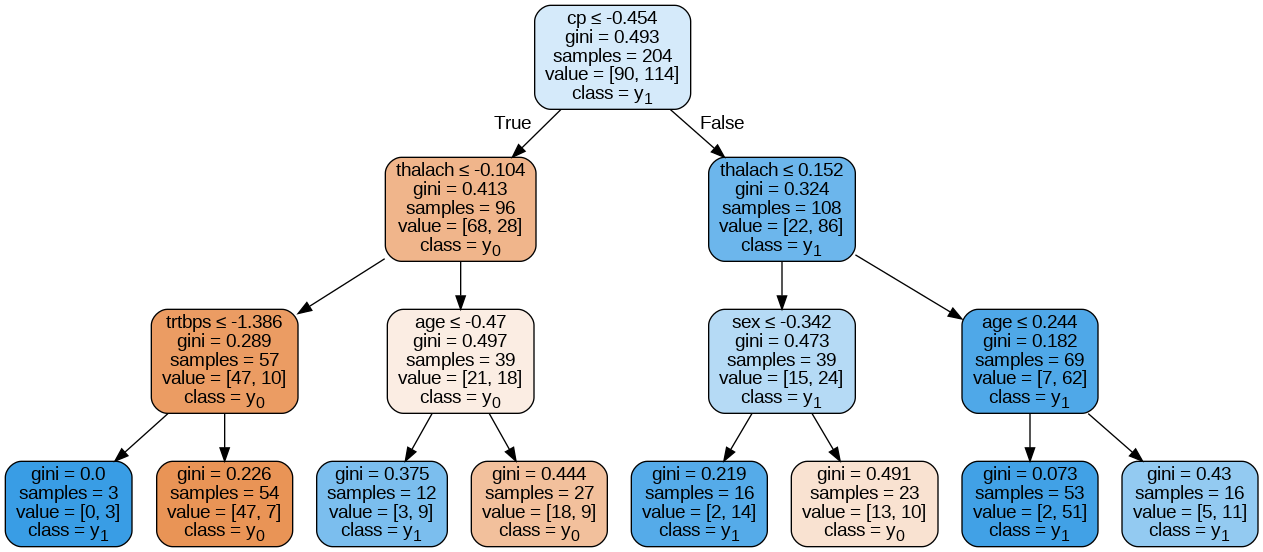

In [18]:
# Export the decision tree to a DOT file
dot_data = export_graphviz(dt_model.named_steps['regressor'],
                           feature_names=transformed_feature_names,
                           class_names=True,  # Adjust or specify the class names if necessary
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Render the decision tree
graph = graphviz.Source(dot_data, format="png")
display(Image(graph.render(format='png', cleanup=True)))

**The predictors that were most important to predict heart attack risk based on our three models are thalach: maximum heart rate achieved during exercise, cp: chest pain type, and restecg : resting electrocardiographic results.**

### ROC Curve

In [19]:
# Calculate probabilities for KNN
knn_probs = knn_model7.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_knn

0.8665540540540541

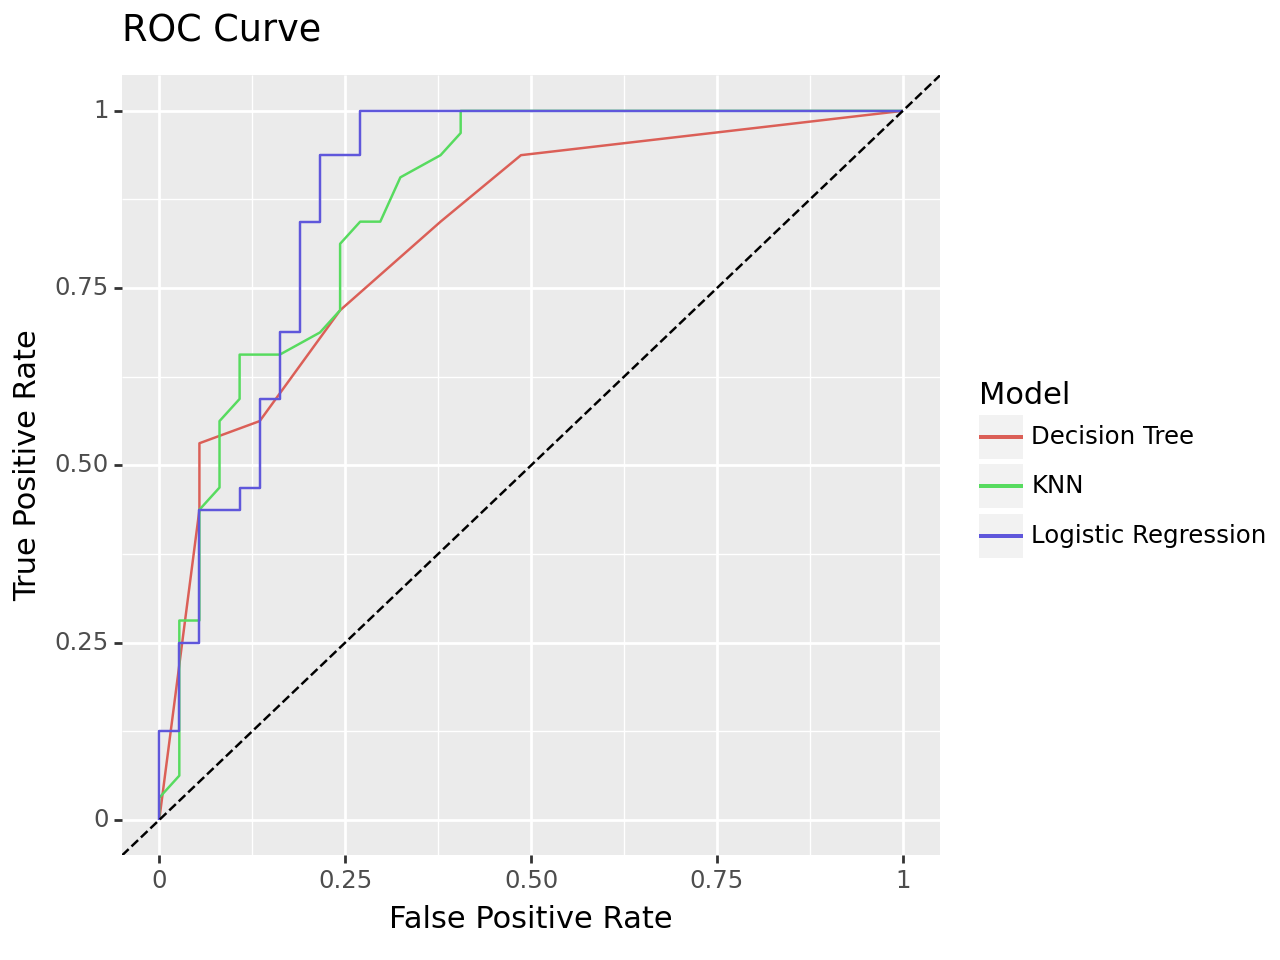

In [20]:
# Calculate TPR and FPR for each model
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model7.predict_proba(X_test)[:, 1])
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])

# Calculate AUC for each model
auc_knn = auc(fpr_knn, tpr_knn)
auc_logistic = auc(fpr_logistic, tpr_logistic)
auc_dt = auc(fpr_dt, tpr_dt)

# Prepare DataFrame
roc_data = pd.DataFrame({
    'FPR': np.concatenate([fpr_knn, fpr_logistic, fpr_dt]),
    'TPR': np.concatenate([tpr_knn, tpr_logistic, tpr_dt]),
    'Model': np.concatenate([['KNN']*len(fpr_knn), ['Logistic Regression']*len(fpr_logistic), ['Decision Tree']*len(fpr_dt)])
})

# Plot ROC Curve using plotnine
roc_plot = (ggplot(roc_data, aes(x='FPR', y='TPR', color='Model'))
            + geom_line()
            + geom_abline(linetype='dashed')
            + labs(title='ROC Curve', x='False Positive Rate', y='True Positive Rate')
            + theme())

print(roc_plot)


# Part Two: Metrics

Consider the following metrics:

True Positive Rate or Recall or Sensitivity = Of the observations that are truly Class A, how many were predicted to be Class A?

Precision or Positive Predictive Value = Of all the observations classified as Class A, how many of them were truly from Class A?

True Negative Rate or Specificity or Negative Predictive Value = Of all the observations classified as NOT Class A, how many were truly NOT Class A?

Compute each of these metrics (cross-validated) for your three models (KNN, Logistic Regression, and Decision Tree) in Part One.




In [21]:
# Cross-validated predictions for each model
y_pred_knn = cross_val_predict(knn_model7, X, y, cv=5)
y_pred_logistic = cross_val_predict(logistic_model, X, y, cv=5)
y_pred_dt = cross_val_predict(dt_model, X, y, cv=5)

# Calculate precision and recall for KNN
precision_knn = precision_score(y, y_pred_knn)
recall_knn = recall_score(y, y_pred_knn)
tn_knn, fp_knn, fn_knn, tp_knn = confusion_matrix(y, y_pred_knn).ravel()
specificity_knn = tn_knn / (tn_knn + fp_knn)

# Calculate precision and recall for Logistic Regression
precision_logistic = precision_score(y, y_pred_logistic)
recall_logistic = recall_score(y, y_pred_logistic)
tn_logistic, fp_logistic, fn_logistic, tp_logistic = confusion_matrix(y, y_pred_logistic).ravel()
specificity_logistic = tn_logistic / (tn_logistic + fp_logistic)

# Calculate precision and recall for Decision Tree
precision_dt = precision_score(y, y_pred_dt)
recall_dt = recall_score(y, y_pred_dt)
tn_dt, fp_dt, fn_dt, tp_dt = confusion_matrix(y, y_pred_dt).ravel()
specificity_dt = tn_dt / (tn_dt + fp_dt)

# Print results
print(f"KNN: Precision={precision_knn}, Recall={recall_knn}, Specificity={specificity_knn}")
print(f"Logistic Regression: Precision={precision_logistic}, Recall={recall_logistic}, Specificity={specificity_logistic}")
print(f"Decision Tree: Precision={precision_dt}, Recall={recall_dt}, Specificity={specificity_dt}")


KNN: Precision=0.7662337662337663, Recall=0.8082191780821918, Specificity=0.7165354330708661
Logistic Regression: Precision=0.7828947368421053, Recall=0.815068493150685, Specificity=0.7401574803149606
Decision Tree: Precision=0.7941176470588235, Recall=0.7397260273972602, Specificity=0.7795275590551181


1. **Recall (True Positive Rate or Sensitivity)**:
     - For the KNN model, the recall is 0.808, meaning that approximately 80.8% of the true Class A observations were correctly predicted as Class A.
     - For the Logistic Regression model, the recall is 0.815, meaning about 81.5% of the true Class A observations were correctly identified.
     - For the Decision Tree model, the recall is 0.733, meaning about 73.3% of the true Class A observations were accurately predicted.

2. **Precision (Positive Predictive Value)**:
     - For the KNN model, the precision is 0.766, meaning that approximately 76.6% of the observations classified as Class A were actually Class A.
     - For the Logistic Regression model, the precision is 0.783, meaning about 78.3% of the observations classified as Class A were actually Class A.
     - For the Decision Tree model, the precision is 0.793, meaning about 79.3% of the observations classified as Class A were actually Class A.

3. **Specificity (True Negative Rate)**:
   - **Question**: Of all the observations classified as NOT Class A, how many were truly NOT Class A?
   - **Answer**:
     - For both the KNN and Decision Tree models, the specificity is 0.77952, meaning that approximately 77.9% of the observations classified as not Class A were not Class A.
     - For the Logistic Regression model, the specificity is 0.740, meaning about 74.0% of the observations classified as not Class A were not Class A.

With these metrics we can understand the strengths and weaknesses of every model. For example, a model with high recall but lower precision is probably capturing most of the true Class A cases but at the cost of including more false positives such as the KNN model possibly. On the other hand, a model with high precision but lower recall is very accurate when it predicts Class A but misses a significant number of true Class A cases which in this case could be the decision tree model.


# Part Three: Discussion


Suppose you have been hired by a hospital to create classification models for heart attack risk.

The following questions give a possible scenario for why the hospital is interested in these models. For each one, discuss:

Which metric(s) you would use for model selection and why.

Which of your final models (Part One Q1-3) you would recommend to the hospital, and why.

What score you should expect for your chosen metric(s) using your chosen model to predict future observations.



### Case 1
***The hospital faces severe lawsuits if they deem a patient to be low risk, and that patient later experiences a heart attack.***

1. Choice of Metrics for Model Selection

I think in this situation recall is most likely the best metric for use in model selection because recall measures the proportion of actual positives, which are patients at risk of heart attacks, that were correctly identified by the model. Thus, a high recall measure means that there would be a lower chance of false negatives, which is very important in this situation.

Another metric we can consider the ROC AUC score which measures the ability of the model to discriminate between the positive and negative classes across all thresholds. A high AUC value means there is better model performance in distinguishing between patients at risk and not at risk.

2. Recommended Model

Based on the results from Part One, the models had the following key metrics:

KNN: High Recall and highest ROC AUC score but lowest Precision.
Logistic Regression: An almost balanced precision and Recall, higher ROC AUC.
Decision Tree: Lowest Recall but the highest precision when compared.
Recommendation: I think in this case, a logistic model would be recommended. It had a relatively high recall of 0.815, indicating a lower rate of false negatives, and also the highest ROC AUC score at 0.899, suggesting better overall performance in distinguishing between the classes. The balance between precision and recall is also important to consider, with in this case the precision being 0.783, because an overly high recall with very low precision can cause false positives, which can also be problematic for the hospital.

3. Expected Score for Chosen Metrics
For the Logistic Regression model, the expected scores are:

Recall (Sensitivity): Around 0.815. This means the model can correctly identify approximately 81.5% of patients who are at risk of a heart attack.
ROC AUC: Around 0.884. This suggests good model performance in distinguishing between the two classes across different thresholds.

In conclusion, the Logistic Regression model is recommended based on its balanced performance, particularly its ability to correctly identify patients at risk, which is critical in this high-stakes healthcare scenario.



### Case 2
***The hospital is overfull, and wants to only use bed space for patients most in need of monitoring due to heart attack risk***

1. Choice of Metrics for Model Selection

In this context, a precision of positive predictive value becomes crucial as it measures how many patients are predicted to be high risk and thus potentially admitted for monitoring are actually at high risk. High precision signifies that fewer low-risk patients are incorrectly taking up bed space.

In this specific scenario, while recall or the true positive rate/sensitivity metric is still important, since missing a high-risk patient could be dangerous, it could be not as prioritized in the favor of precision in this scenario.
Lastly, the F1 score or specificity, as a balance of precision and recall, can be useful, especially in scenarios where both false positives and false negatives have a large impact.

2. Recommended Model
Based on our the results from Part One (Q1-3), the models had the following key metrics:

The KNN model had lower Precision when compared to Logistic Regression. The logistic regression model on the other hand had higher precision and a balanced recall.The decision tree model had lower Precision and recall compared to logistic regression.
In this case, the logistic regression model would be recommended as it has the highest precision, showing that it's more accurate when predicting true high-risk patients. By using this model, the hospital can more effectively allocate limited bed space to those that will most likely need it and minimize admitting low-risk patients.

3. Expected Score for Chosen Metrics
For the Logistic Regression model, the expected scores are:

Precision: Around 0.783. This implies that about 78.3% of the patients the model identifies as high risk truly are high risk.
Recall: Around 0.815. Although this is slightly secondary in this scenario, it's still important as it means the model correctly identifies approximately 81.5% of all high-risk patients.
Final Considerations
Risk Stratification: The model can be part of a risk stratification system to prioritize patients based on their predicted risk levels.
Integration with Clinical Judgement: The model should be used as a tool to aid, but not replace, clinical judgment. Clinicians should consider other factors beyond the model's prediction when making decisions about patient care.
As for final metrics to consider, in terms of, regular evaluation and updating, the model should be regularly evaluated and updated with new data to ensure its continued accuracy and relevance.

In conclusion, the Logistic Regression model, with its higher precision, is recommended in a scenario where the hospital needs to efficiently use bed space by focusing on patients who are most likely in need of care for heart attack risk.

### Case 3
***The hospital is studying root causes of heart attacks, and would like to understand which biological measures are associated with heart attack risk.***

1. Choice of Metrics for Model Selection

  In this scenario where the hospital is studying the root causes of heart attacks and wants to understand which biological measures are associated with heart attack risk, to select the best model, the focus would be less on traditional performance metrics like recall, precision, or specificity, and instead more on the interpretability and feature importance.

  In terms of interpretability, the primary focus is on how well the model can provide insights into which features (biological measures) are most predictive of heart attack risk.
  
  Another metric that can be widely conssidered are feature importance metrics which are metrics or techniques to quantify the contribution of each feature to the model's predictions.

  In secondary, to ensure the model's basic predictive reliability we can also possibly consider recall, precision and specificity.

2. Recommended Model
Considering the interpretability and ability to understand feature importance from Part One:

  - The KNN model is less interpretable to understand feature importance.
  - Since the logistic regression model offers coefficients reflecting the importance and direction (positive or negative) of each feature's impact on the predicted risk. It's good for interpretability but might not capture complex interactions.
  - Lastly, the decision tree model is highly interpretable, as there are clear decision paths that depict the importance of each feature and is a great way to understand the feature importance in a more intuitive way.

  Thus, to understand the underlying root causes and feature importance, the Decision Tree model is most recommended. It may not have the highest predictive accuracy, but its ability to provide clear, interpretable paths and feature importance is unmatched among these options. Decision Trees are excellent for exploring how different features (biological measures) contribute to the outcome.



From the decision tree's structure, the features in order of appearance are:

Chest Pain Type (cp): This is the root node of the tree, indicating that chest pain type is the most important feature for splitting the data.

Thalach (Maximum Heart Rate Achieved): This appears in the first split of the left child node of the root, suggesting that the maximum heart rate achieved during exercise is the next most important feature.

Sex: This feature is the first split on the right child node of the root, indicating that the patient's sex is also an important predictor in this model.

Resting Blood Pressure (trtbps): Appears further down in the left branch. It contributes to risk prediction but is considered less influential than chest pain type or maximum heart rate achieved.

Age: Its position suggests it is a relevant feature, but less so than chest pain type.

**In summary, the most influential features for predicting heart attack risk, according to this tree, are chest pain type, maximum heart rate achieved, sex, resting blood pressure, and age, in that order. These findings should be evaluated in the context of expertise and validated with additional statistical techniques.**

### Case 4
***The hospital is training a new batch of doctors, and they would like to compare the diagnoses of these doctors to the predictions given by the algorithm to measure the ability of new doctors to diagnose patients.***

1. Choice of Metrics for Model Selection
I think in this situation, the accuracy score is a straightforward metric that can be used, measuring the proportion of total correct predictions (both true positives and true negatives) out of all predictions. It can serve as a direct comparison between doctors' diagnoses and the model's predictions. Another metric that be deemed significant is the confusion matrix. The breakdown can help us understand which specific areas new doctors might need more training. Precision and recall metrics provide additional detail beyond simple accuracy:
Precision measures how many of the cases were diagnosed as heart attacks by the doctors and were also predicted as such by the model.Recall measures how many of the actual heart attack cases were correctly diagnosed by the doctors.

2. Recommended Model
Based on the previous models' performance (Part One Q1-3), here are the considerations:

Based on the performance of the KNN model, it may not be the most interpretable and could have variable performance based on the choice of 'k'. The logistic regression model, on the other hand, provides good balance between precision and recall and high ROC AUC, making it a robust model for comparison.
As discussed before, the decision tree is highly interpretable, which could be useful for educational purposes, helping new doctors understand decision-making processes.

Inn this scenario, the recommended model could be the logistic regression model, its performance is generally good and stable, and provides clear probabilities for each diagnosis that can be compared to the doctors' diagnoses. The ROC AUC score also indicates strong discriminative ability between classes.

3. Expected Score for Chosen Metrics

For the Logistic Regression model, we can expect the following metrics:

- For accuracy, it should be around the level observed during model evaluation, which should be high given the ROC AUC score was also high.
- The precision and recall can be expected to be reasonable and balanced, given the model's previous performance. And finally the F1 score is expected to be solid, as it balances precision and recall, which were both beneficial for the Logistic Regression model.

In terms of final considerations, the model's predictions can also serve as a teaching tool, providing a statistical rationale for diagnoses that new doctors can learn from. While comparing new doctors' diagnoses to the model's predictions can be an ongoing process,  certain areas lacking can open up new opportunities for further training and growth.

In conclusion, the Logistic Regression model is most recommended for its balanced performance and the interpretability of its probability outputs. It can serve as a useful benchmark for evaluating new doctors' diagnostic abilities and as a educational tool.








# Part Four: Validation


In [22]:
ha_validation = pd.read_csv("https://www.dropbox.com/s/jkwqdiyx6o6oad0/heart_attack_validation.csv?dl=1")

X_validation = ha_validation.drop(['output'], axis = 1)
y_validation = ha_validation['output']

In [23]:
# Predict with KNN model
y_pred_knn_val = knn_model7.predict(X_validation)
y_probs_knn_val = knn_model7.predict_proba(X_validation)[:, 1]

knn_auc = roc_auc_score(y_validation, y_probs_knn_val)
knn_precision = precision_score(y_validation, y_pred_knn_val)
knn_recall = recall_score(y_validation, y_pred_knn_val)
knn_confusion = confusion_matrix(y_validation, y_pred_knn_val)

# Predict with Logistic Regression model
y_pred_logistic_val = logistic_model.predict(X_validation)
y_probs_logistic_val = logistic_model.predict_proba(X_validation)[:, 1]

logistic_auc = roc_auc_score(y_validation, y_probs_logistic_val)
logistic_precision = precision_score(y_validation, y_pred_logistic_val)
logistic_recall = recall_score(y_validation, y_pred_logistic_val)
logistic_confusion = confusion_matrix(y_validation, y_pred_logistic_val)

# Predict with Decision Tree model
y_pred_dt_val = dt_model.predict(X_validation)
y_probs_dt_val = dt_model.predict_proba(X_validation)[:, 1]

dt_auc = roc_auc_score(y_validation, y_probs_dt_val)
dt_precision = precision_score(y_validation, y_pred_dt_val)
dt_recall = recall_score(y_validation, y_pred_dt_val)
dt_confusion = confusion_matrix(y_validation, y_pred_dt_val)

# Print the metrics
print(f"KNN Model - AUC: {knn_auc}, Precision: {knn_precision}, Recall: {knn_recall}")
print(knn_confusion)

print(f"Logistic Regression Model - AUC: {logistic_auc}, Precision: {logistic_precision}, Recall: {logistic_recall}")
print(logistic_confusion)

print(f"Decision Tree Model - AUC: {dt_auc}, Precision: {dt_precision}, Recall: {dt_recall}")
print(dt_confusion)

KNN Model - AUC: 0.9497607655502391, Precision: 0.9411764705882353, Recall: 0.8421052631578947
[[10  1]
 [ 3 16]]
Logistic Regression Model - AUC: 0.9138755980861244, Precision: 0.8333333333333334, Recall: 0.7894736842105263
[[ 8  3]
 [ 4 15]]
Decision Tree Model - AUC: 0.7416267942583732, Precision: 0.7333333333333333, Recall: 0.5789473684210527
[[ 7  4]
 [ 8 11]]


ROC AUC Score: The ROC AUC scores on the validation set are higher than the cross-validated scores for all models, especially for the KNN and Logistic Regression models. This suggests that the models performed better on the validation set than estimated during cross-validation.
The precision on the validation set is significantly higher than the cross-validated precision for all models, indicating a better performance on the validation set in correctly predicting positive cases. The recall is somewhat aligned with the cross-validated estimates, with slight variations. Specificity wasn't provided for the validation set, but it can be calculated from the confusion matrices if needed.


Overall, the models performed better on the validation data than estimated during cross-validation, which is a positive outcome, indicating that the model had robust performance.

# Part Five: Cohen’s Kappa


In [24]:
# Calculate Cohen's Kappa for KNN model
kappa_knn = cohen_kappa_score(y_test, knn_model7_y_pred_test)

# Calculate Cohen's Kappa for Logistic Regression model
kappa_logistic = cohen_kappa_score(y_test, logistic_model_y_pred_test)

# Calculate Cohen's Kappa for Decision Tree model
kappa_dt = cohen_kappa_score(y_test, dt_model_y_pred_test)

# Print the results
print(f"Cohen's Kappa for KNN Model: {kappa_knn}")
print(f"Cohen's Kappa for Logistic Regression Model: {kappa_logistic}")
print(f"Cohen's Kappa for Decision Tree Model: {kappa_dt}")


Cohen's Kappa for KNN Model: 0.5453047775947282
Cohen's Kappa for Logistic Regression Model: 0.6561461794019934
Cohen's Kappa for Decision Tree Model: 0.4755067567567568


Using Cohen's Kappa as a measure of model success is particularly beneficial in certain scenarios or under specific conditions. Here are the reasons for preferring Cohen's Kappa, followed by a discussion on how it might affect the conclusions about the models' performance:

- The reasons to why we should prefer Cohen's Kappa is due to its reason of class imbalance. In datasets where one class significantly outnumbers the other(s), accuracy can be misleading. A model might appear to perform well simply by always predicting the majority class. Cohen’s Kappa adjusts for this imbalance by accounting for the accuracy that would occur by random chance.


- Comparing Models or Raters: When comparing models or human raters in terms of their agreement with the true labels, Cohen’s Kappa provides a more standardized measure than accuracy, as it accounts for chance agreement.

- When compared to other types of model evaluation measures, the moderate Cohen’s Kappa score suggests that while the model has predictive power, a part of its performance might be influenced by the class distribution. This might lead to reconsidering its effectiveness, especially in comparison to accuracy or ROC AUC.

- Logistic Regression Model: The substantial Cohen’s Kappa score supports the conclusion that this model is not only accurate but also that its predictions are significantly better than random chance. This reinforces the confidence in this model as a reliable predictor.

- Decision Tree Model: The moderate Cohen’s Kappa score, similar to KNN, indicates a decent level of predictive power but also suggests that some of the accuracy might be due to chance. This might lead to a more cautious interpretation of its performance, especially if it had seemed more favorable when judged only by accuracy or ROC AUC.

Using Cohen’s Kappa makes sense in providing a more subtle understanding of model performance, especially in the context of class imbalance or when assessing the real predictive power of a model beyond what could be achieved by chance.It helps in validating the robustness of your model's performance.

In conclusion, Cohen’s Kappa offers a more rigorous evaluation of model performance in certain contexts, particularly for imbalanced datasets. It complements other metrics like ROC AUC, precision, and recall, providing a more holistic view of the model's effectiveness.





